In [ ]:
# useful article about OHLC data aggregation:
# applicable to websocket streams of tick by tick data
# https://blog.quantinsti.com/tick-tick-ohlc-data-pandas-tutorial/


In [1]:
# jupyter did not want to load already installed talib library 
# so had to reinstall it via anaconda as well 
#!conda install -c conda-forge ta-lib
import talib as ta
import yfinance as yf
import pandas as pd
import sqlite3

In [2]:
# custom function imports
from functions_gen import *        # general functions
from functions_ml import *         # machine learning
from functions_viz import *        # visualization
from functions_db import *         # database

# custom indicators moved to modules
from functions_superjump import *
from functions_HHLL import *
from functions_HHLL_conf import *
from functions_HHLL_channel import *
from functions_gator import *

# Random Forest specific functions
from functions_forest import *

In [3]:
from configparser import ConfigParser

In [4]:
config = ConfigParser()
config.read("config.ini")
API_KEY = config.get("alpaca", "API_KEY")
SECRET_KEY = config.get("alpaca", "SECRET_KEY")

print(f"API_KEY:    ", API_KEY)
print(f"SECRET_KEY: ", SECRET_KEY)

API_KEY:     PKSFK7J9SU5JJM38DVLP
SECRET_KEY:  m6VCZI2T2DJ3frjxAMlSJk17eO67mZHIrCCng4R5


In [ ]:
# sqlite database structure is following:
#
#sqlite> .header on
#sqlite> .mode column
#sqlite> select * from alpaca_websocket_stream_data LIMIT 10;
#timestamp                            symbol  price   size  exchange  conditions  tape  id   
#-----------------------------------  ------  ------  ----  --------  ----------  ----  -----
#2022-07-19 15:49:25.477387108-04:00  AAPL    150.8   100   V         ['@']       C     10807
#32022-07-19 15:49:27.252579851-04:00  AAPL    150.81  3     V         ['@', 'I']  C     10808
#2022-07-19 15:49:27.252579851-04:00  AAPL    150.81  100   V         ['@']       C     10809
#2022-07-19 15:49:27.666163652-04:00  AAPL    150.81  100   V         ['@']       C     10810
#2022-07-19 15:49:27.666164795-04:00  AAPL    150.81  200   V         ['@']       C     10811
#2022-07-19 15:49:29.248316808-04:00  AAPL    150.79  100   V         ['@']       C     10812
#2022-07-19 15:49:32.963910211-04:00  AAPL    150.78  35    V         ['@', 'I']  C     10813
#2022-07-19 15:49:36.611092454-04:00  AAPL    150.77  2     V         ['@', 'I']  C     10814
#2022-07-19 15:49:36.612940345-04:00  AAPL    150.77  100   V         ['@']       C     10815
#2022-07-19 15:49:37.083678369-04:00  AAPL    150.76  100   V         ['@']       C     10816
#sqlite> 





# Exploratory data wrangling
Optionally uncomment the code to get insights to individual steps.
Can be useful for db troubleshooting later

In [ ]:
# connect to sqlite database and get all data where symbol is AAPL
# symbol is external variable
# pandas to onnect to database and aggregate price data to 1 minute granularity in pandas

#symbol='AAPL'
#
#conn = sqlite3.connect("alpaca_websocket_stream_data.db")
#c = conn.cursor()
#c.execute("SELECT * FROM alpaca_websocket_stream_data WHERE symbol = ?", (symbol,))
#data = c.fetchall()
#conn.close()

In [ ]:
#data

In [ ]:
# LOAD ONE DAY BACK

# connect to sqlite database and get all data where symbol is AAPL
# timestamp is from 24 hours ago to now
#conn = sqlite3.connect("alpaca_websocket_stream_data.db")
#c = conn.cursor()
#c.execute("SELECT * FROM alpaca_websocket_stream_data WHERE symbol = 'AAPL' AND timestamp BETWEEN datetime('now', '-1 month') AND datetime('now')")
#data = c.fetchall()
#conn.close()

In [ ]:
#data

In [ ]:
# load data to dataframe
#df = pd.DataFrame(data, columns=["timestamp", "symbol", "price", "size", "exchange", "conditions", "tape", "id"])

In [ ]:
#df

In [ ]:
#df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ns")

In [ ]:
#df["date"] = df["timestamp"].dt.date

In [ ]:
#df

In [ ]:
#df = df.set_index("timestamp")


In [ ]:
#df_resampled = df['price'].resample("1Min").ohlc(_method='ohlc')

In [ ]:
#df_resampled

In [ ]:
#df = df.reset_index()
#df = df.sort_values(by=["symbol"])

## Get data from Alpaca (historical, not socket stream)

In [ ]:
get_alpaca_hist_data("BTCUSD", "crypto", API_KEY, SECRET_KEY)

In [ ]:
get_alpaca_hist_data("AAPL", "stocks", API_KEY, SECRET_KEY)

# Making function flow
one function for getting the data for specific ticker from the database
another function to process the df into resampled df with 1 and 5 min granularity

In [5]:
symbol = 'AAPL'
db_name = 'alpaca_websocket_stream_data.db'
table_name= 'alpaca_websocket_stream_data'
granularity = '1Min'
interval = "1m"  # for yahoo finance model training if needed 

In [ ]:
# gets data only for last n days for given ticker
#data =  get_ticker_data_from_db_days_back(symbol, db_name, table_name)

In [ ]:
#data

In [6]:
# gets all data from db for given ticker
data =  get_ticker_data_from_db(symbol, db_name, table_name)

In [7]:
data

[('2022-09-21 12:03:09.755242341-04:00',
  'AAPL',
  156.2,
  1,
  'V',
  "['@', 'I']",
  'C',
  6157),
 ('2022-09-21 12:03:16.662475560-04:00',
  'AAPL',
  156.22,
  100,
  'V',
  "['@']",
  'C',
  6158),
 ('2022-09-21 12:03:17.789374456-04:00',
  'AAPL',
  156.24,
  4,
  'V',
  "['@', 'I']",
  'C',
  6159),
 ('2022-09-21 12:03:17.796144201-04:00',
  'AAPL',
  156.25,
  100,
  'V',
  "['@']",
  'C',
  6160),
 ('2022-09-21 12:03:18.667985094-04:00',
  'AAPL',
  156.27,
  100,
  'V',
  "['@']",
  'C',
  6161),
 ('2022-09-21 12:03:20.054643796-04:00',
  'AAPL',
  156.27,
  100,
  'V',
  "['@']",
  'C',
  6162),
 ('2022-09-21 12:03:21.253228100-04:00',
  'AAPL',
  156.29,
  100,
  'V',
  "['@']",
  'C',
  6163),
 ('2022-09-21 12:03:21.253228100-04:00',
  'AAPL',
  156.29,
  100,
  'V',
  "['@']",
  'C',
  6164),
 ('2022-09-21 12:03:21.628505524-04:00',
  'AAPL',
  156.29,
  100,
  'V',
  "['@']",
  'C',
  6165),
 ('2022-09-21 12:03:22.221739755-04:00',
  'AAPL',
  156.275,
  100,
  'V',
 

In [8]:
# resample tick by tick data from db to minute timeframe and save to df
df_db =  resample_data(data, granularity=granularity)

In [9]:
df_db

,Date,Open,High,Low,Close,Adj Close
0,2022-09-21 12:03:00-04:00,156.200,156.35,156.200,156.350,156.350
1,2022-09-21 12:04:00-04:00,156.350,156.36,156.290,156.310,156.310
2,2022-09-21 12:05:00-04:00,156.300,156.37,156.280,156.370,156.370
3,2022-09-21 12:06:00-04:00,156.395,156.53,156.395,156.530,156.530
4,2022-09-21 12:07:00-04:00,156.550,156.65,156.540,156.580,156.580
...,...,...,...,...,...,...
232,2022-09-21 15:55:00-04:00,154.450,154.45,154.180,154.210,154.210
233,2022-09-21 15:56:00-04:00,154.185,154.34,154.020,154.030,154.030
234,2022-09-21 15:57:00-04:00,154.040,154.14,154.010,154.030,154.030
235,2022-09-21 15:58:00-04:00,154.040,154.12,154.000,154.055,154.055


## Model training (Random Forest)

In [ ]:
# not needed so far, we can import pretrained model

In [ ]:
# but best to allow for training here as well

In [ ]:
def training_sequence(tickers, interval="1m", model_name="./random_forest.joblib"):
    # initiates training sequence for random forest classifier

    for ticker in tickers:
        print('ticker: ', ticker)
        df = get_data(ticker, interval)
        plot_train_data(df, ticker)


        #print(df)

        # custom indicator extension:
        # create extra features from new indicators into new dfs
        # and then join the dfs based on minute datetime with original df
        # our model also needs 1/0 instead of True/False
        # thrend_conf col needs conversion from 'u','d' to 1,0
        out_df1 = superjumpTBB(df)      # superjumpTBB
        out_df1.replace({False: 0, True: 1}, inplace=True)

        out_df2 = HHLL_Strategy(df)  # HHHL indicator
        out_df2.replace({False: 0, True: 1}, inplace=True)

        out_df3 = HHLL_confirmation(df)  # HHHL indicator
        out_df3.replace({'d': 0, 'u': 1, 'none': -1}, inplace=True)

        out_df4 = HHLL_Channel(df)
        
        out_df5 = rsi_strategy(df) # RSI gator indicator


        df = compute_technical_indicators(df)
        df = compute_features(df)
        df = define_target_condition(df)

        # TODO, verify that inner join is what we really need
        # merging with new dataframes with custom indicators
        df = pd.merge(df, out_df1, how='inner', on='Date')
        df = pd.merge(df, out_df2, how='inner', on='Date')
        df = pd.merge(df, out_df3, how='inner', on='Date')
        df = pd.merge(df, out_df4, how='inner', on='Date')
        df = pd.merge(df, out_df5, how='inner', on='Date')

        #print('regular df')
        #print(df)

        clf = splitting_and_training(df)

        save_model(clf, model_name)
        
        # commenting out saves time during training
        #df = predict_timeseries(df, clf)
        #plot_stock_prediction(df, ticker)

    return None

In [ ]:
# training stock data
tickers = ['SPY', 'F', 'IBM', 'GE', 'AAPL', 'ADM'] 

In [ ]:
training_sequence(tickers, interval="1m", model_name="./random_forest.joblib")

## Feature importance visualization 
(Random Forest only)

In [10]:
# load classifier, no need to initialize the loaded_rf
clf = joblib.load("./random_forest.joblib")

In [11]:
predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','RSI','oversoldRSI','overboughtRSI',
                   'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40','aboveEMA50',
                   'aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90',
                   'aboveEMA100','aboveEMA200',
                   'LongSig','ShortSig','WLongSig','WShortSig',
                   'HH','LL','HL','LH',
                   'trend_conf','HHLL_channel_sig','rsi_gator_sig'
                  ]

Elapsed time to compute the importances: 0.121 seconds


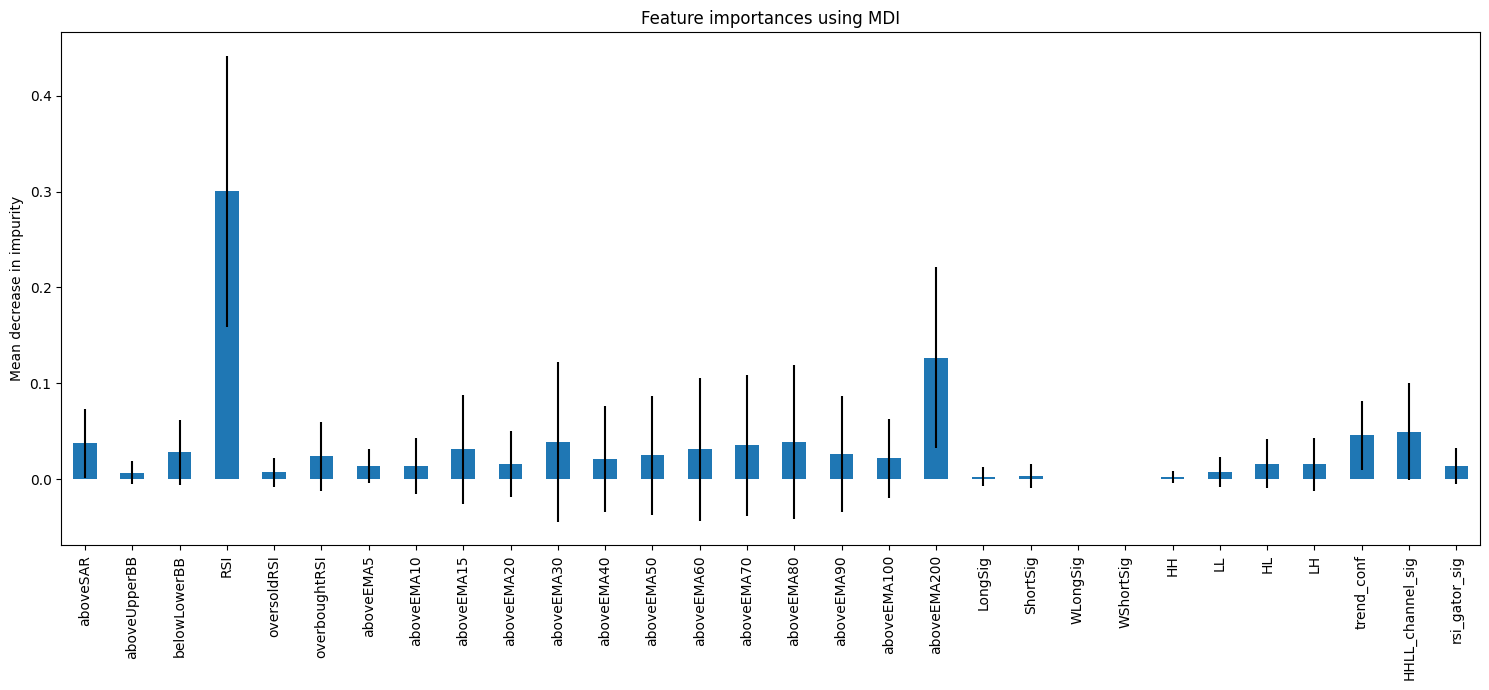

In [12]:
plot_forest_feature_importances(clf, predictors_list)

# Predictions
- now we have dataframe and can compute whatever indicators we want
- and then connect it to our predictive model and even visualize in streamlit

In [13]:
# load classifier, no need to initialize the loaded_rf
clf = joblib.load("./random_forest.joblib")

In [14]:
# this is dataframe from db
df_db.tail(2)

,Date,Open,High,Low,Close,Adj Close
235,2022-09-21 15:58:00-04:00,154.04,154.12,154.00,154.055,154.055
236,2022-09-21 15:59:00-04:00,154.05,154.06,153.69,153.710,153.710


#### Temporary workaround - Yahoo
Due to issue with custom indicators interacting with db data, we will take 1 minute data from yahoo for now.

In [ ]:
# temp workaround since some indicator failing
# they might be failing maybe because some NaN values in our df from database
# need to investigate in detail
df = get_data(symbol, interval)

#### Temporary workaround - Alpaca
Alternatively we can get historical data from Alpaca.

In [ ]:
df = get_alpaca_hist_data("BTCUSD", "crypto", API_KEY, SECRET_KEY)    # crypto
#df = get_alpaca_hist_data("AAPL", "stocks", API_KEY, SECRET_KEY)    # stocks 15 mins delayed with free API

In [ ]:
#pd.to_datetime(df['Date'])

In [15]:
df = df_db   # use data from database

In [16]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close
235,2022-09-21 15:58:00-04:00,154.04,154.12,154.00,154.055,154.055
236,2022-09-21 15:59:00-04:00,154.05,154.06,153.69,153.710,153.710


<AxesSubplot:>

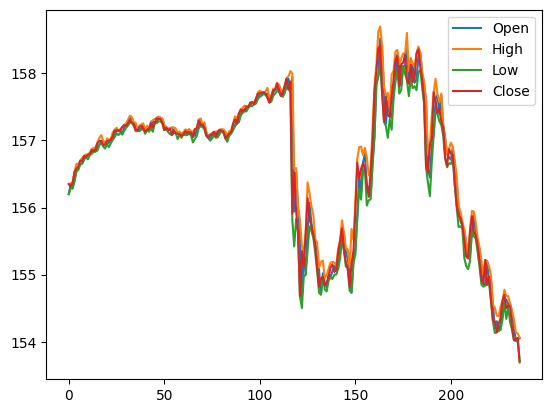

In [17]:
# --- plot whole dataframe ---
#df[['Open','High','Low','Close', 'EMA20']].plot()
df[['Open','High','Low','Close']].plot()

In [ ]:
# --- plot tail of the dataframe ---
#df[['Open','High','Low','Close']].iloc[-20:].plot()

In [ ]:
# we take df that was taken from db and resampled to minute granularity (1min, 5min)
# and we will compute various indicators for it
# including custom indicators

In [18]:
# prepare dfs with extra indicators
out_df1 = superjumpTBB(df)      # superjumpTBB
out_df1.replace({False: 0, True: 1}, inplace=True)

out_df2 = HHLL_Strategy(df)  # HHHL indicator
out_df2.replace({False: 0, True: 1}, inplace=True)

out_df3 = HHLL_confirmation(df)  # HHLL confirmation
# converting 'u','d', 'none' to integers for 'trend_conf' col
out_df3.replace({'d': 0, 'u': 1, 'none': -1}, inplace=True)

out_df4 = HHLL_Channel(df)

out_df5 = rsi_strategy(df)

LEN SRC: 237


In [19]:
# compute general indicators, features and target
df = compute_technical_indicators(df)
df = compute_features(df)
df = define_target_condition(df)

In [20]:
# merge with custom indicators
df = pd.merge(df, out_df1, how='inner', on='Date')
df = pd.merge(df, out_df2, how='inner', on='Date')
df = pd.merge(df, out_df3, how='inner', on='Date')
df = pd.merge(df, out_df4, how='inner', on='Date')
df = pd.merge(df, out_df5, how='inner', on='Date')

In [21]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,EMA5,EMA10,EMA15,EMA20,...,latestLPrice,firstHBar,firstHPrice,latestHBar,latestHPrice,HHLL_channel_sig,jaws,teeth,lips,rsi_gator_sig
235,2022-09-21 15:58:00-04:00,154.04,154.12,154.00,154.055,154.055,154.154069,154.293454,154.432531,154.293454,...,156.12,219,155.20,221,154.99,-1,25.840356,31.491532,37.686030,0
236,2022-09-21 15:59:00-04:00,154.05,154.06,153.69,153.710,153.710,154.006046,154.187371,154.342214,154.187371,...,156.12,229,154.68,236,154.06,-1,14.468281,26.557240,35.771413,0


In [22]:
# actual prediction
# can take longer if the dataframe is big
predict_timeseries(df, clf)

df length:  237
step:  0 predicted class:  1.0
step:  1 predicted class:  0.0
step:  2 predicted class:  0.0
step:  3 predicted class:  0.0
step:  4 predicted class:  0.0
step:  5 predicted class:  0.0
step:  6 predicted class:  0.0
step:  7 predicted class:  0.0
step:  8 predicted class:  0.0
step:  9 predicted class:  0.0
step:  10 predicted class:  0.0
step:  11 predicted class:  0.0
step:  12 predicted class:  0.0
step:  13 predicted class:  0.0
step:  14 predicted class:  0.0
step:  15 predicted class:  0.0
step:  16 predicted class:  0.0
step:  17 predicted class:  0.0
step:  18 predicted class:  0.0
step:  19 predicted class:  0.0
step:  20 predicted class:  0.0
step:  21 predicted class:  0.0
step:  22 predicted class:  0.0
step:  23 predicted class:  0.0
step:  24 predicted class:  0.0
step:  25 predicted class:  0.0
step:  26 predicted class:  0.0
step:  27 predicted class:  0.0
step:  28 predicted class:  0.0
step:  29 predicted class:  0.0
step:  30 predicted class:  0.0
st

,Date,Open,High,Low,Close,Adj Close,EMA5,EMA10,EMA15,EMA20,...,firstHPrice,latestHBar,latestHPrice,HHLL_channel_sig,jaws,teeth,lips,rsi_gator_sig,Buy,Long
0,2022-09-21 12:03:00-04:00,156.200,156.35,156.200,156.350,156.350,0.000000,0.000000,0.000000,0.000000,...,0.00,0,0.00,0,0.000000,0.000000,0.000000,0,1.0,156.35
1,2022-09-21 12:04:00-04:00,156.350,156.36,156.290,156.310,156.310,0.000000,0.000000,0.000000,0.000000,...,0.00,0,0.00,1,0.000000,0.000000,0.000000,0,0.0,NaN
2,2022-09-21 12:05:00-04:00,156.300,156.37,156.280,156.370,156.370,0.000000,0.000000,0.000000,0.000000,...,0.00,0,0.00,1,0.000000,0.000000,0.000000,0,0.0,NaN
3,2022-09-21 12:06:00-04:00,156.395,156.53,156.395,156.530,156.530,0.000000,0.000000,0.000000,0.000000,...,0.00,0,0.00,1,0.000000,0.000000,0.000000,0,0.0,NaN
4,2022-09-21 12:07:00-04:00,156.550,156.65,156.540,156.580,156.580,156.428000,0.000000,0.000000,0.000000,...,0.00,0,0.00,1,91.354272,0.000000,0.000000,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2022-09-21 15:55:00-04:00,154.450,154.45,154.180,154.210,154.210,154.420607,154.502711,154.626197,154.502711,...,155.20,221,154.99,-1,28.589235,33.191950,38.435657,-1,0.0,NaN
233,2022-09-21 15:56:00-04:00,154.185,154.34,154.020,154.030,154.030,154.290405,154.416764,154.551673,154.416764,...,155.20,221,154.99,-1,22.299934,30.629395,37.450566,0,0.0,NaN
234,2022-09-21 15:57:00-04:00,154.040,154.14,154.010,154.030,154.030,154.203603,154.346443,154.486463,154.346443,...,155.20,221,154.99,-1,22.299934,30.629395,37.450566,0,0.0,NaN
235,2022-09-21 15:58:00-04:00,154.040,154.12,154.000,154.055,154.055,154.154069,154.293454,154.432531,154.293454,...,155.20,221,154.99,-1,25.840356,31.491532,37.686030,0,0.0,NaN


### General prediction plots
does not work well for stocks with intra-day data (for example 1 minute granularity)

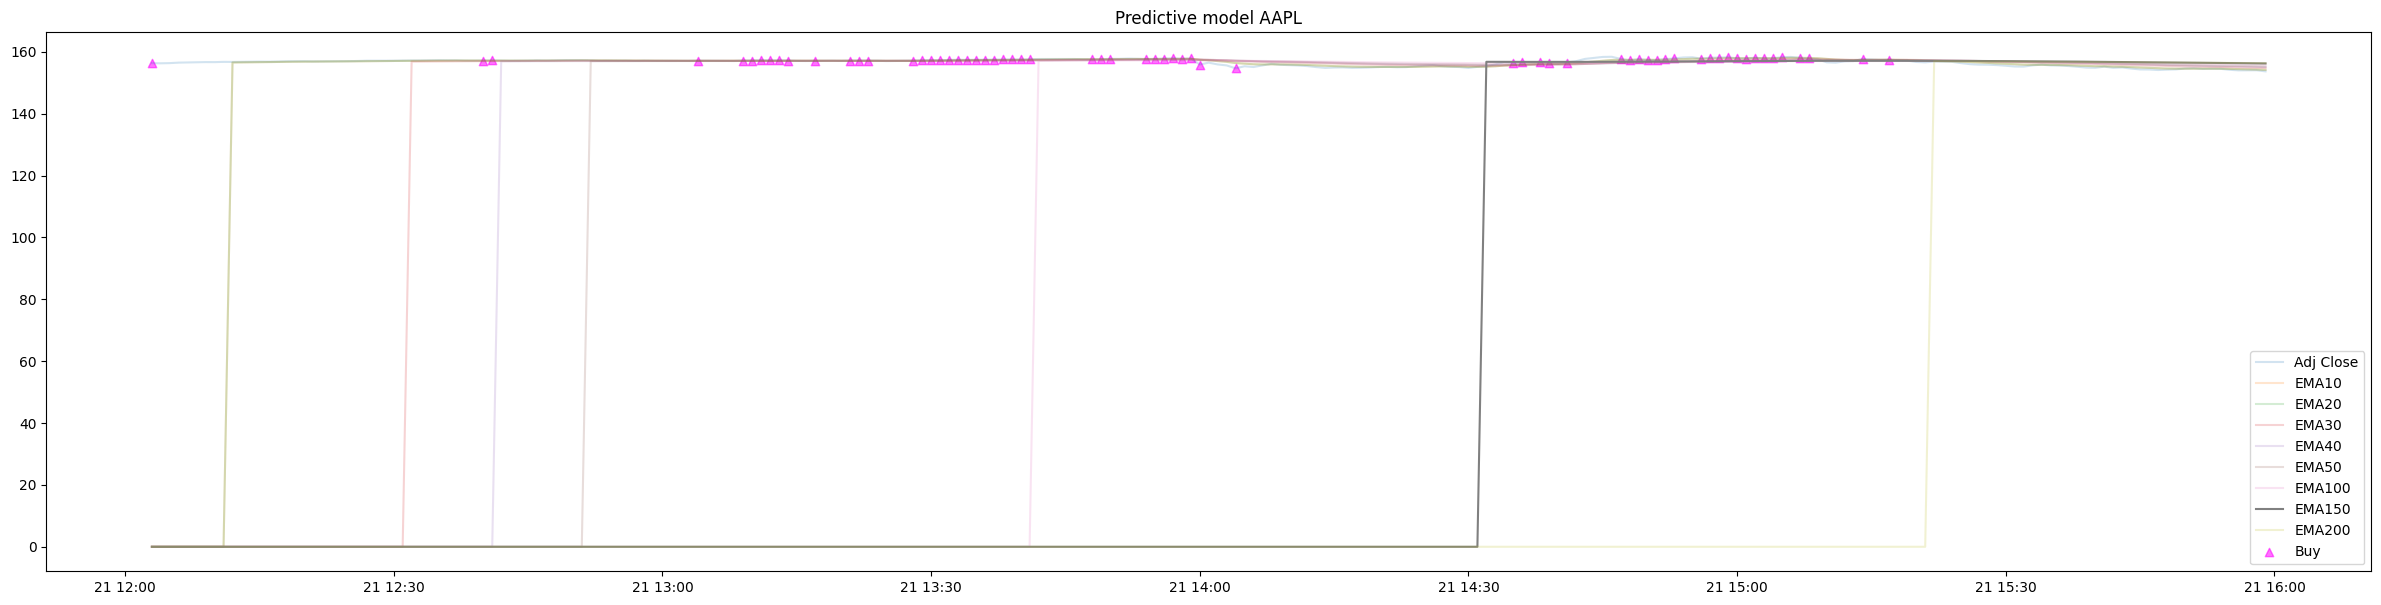

In [23]:
# high level view
ticks_back = 1200 # lookback n candles from now
plot_stock_prediction_tb(df, symbol, ticks_back)

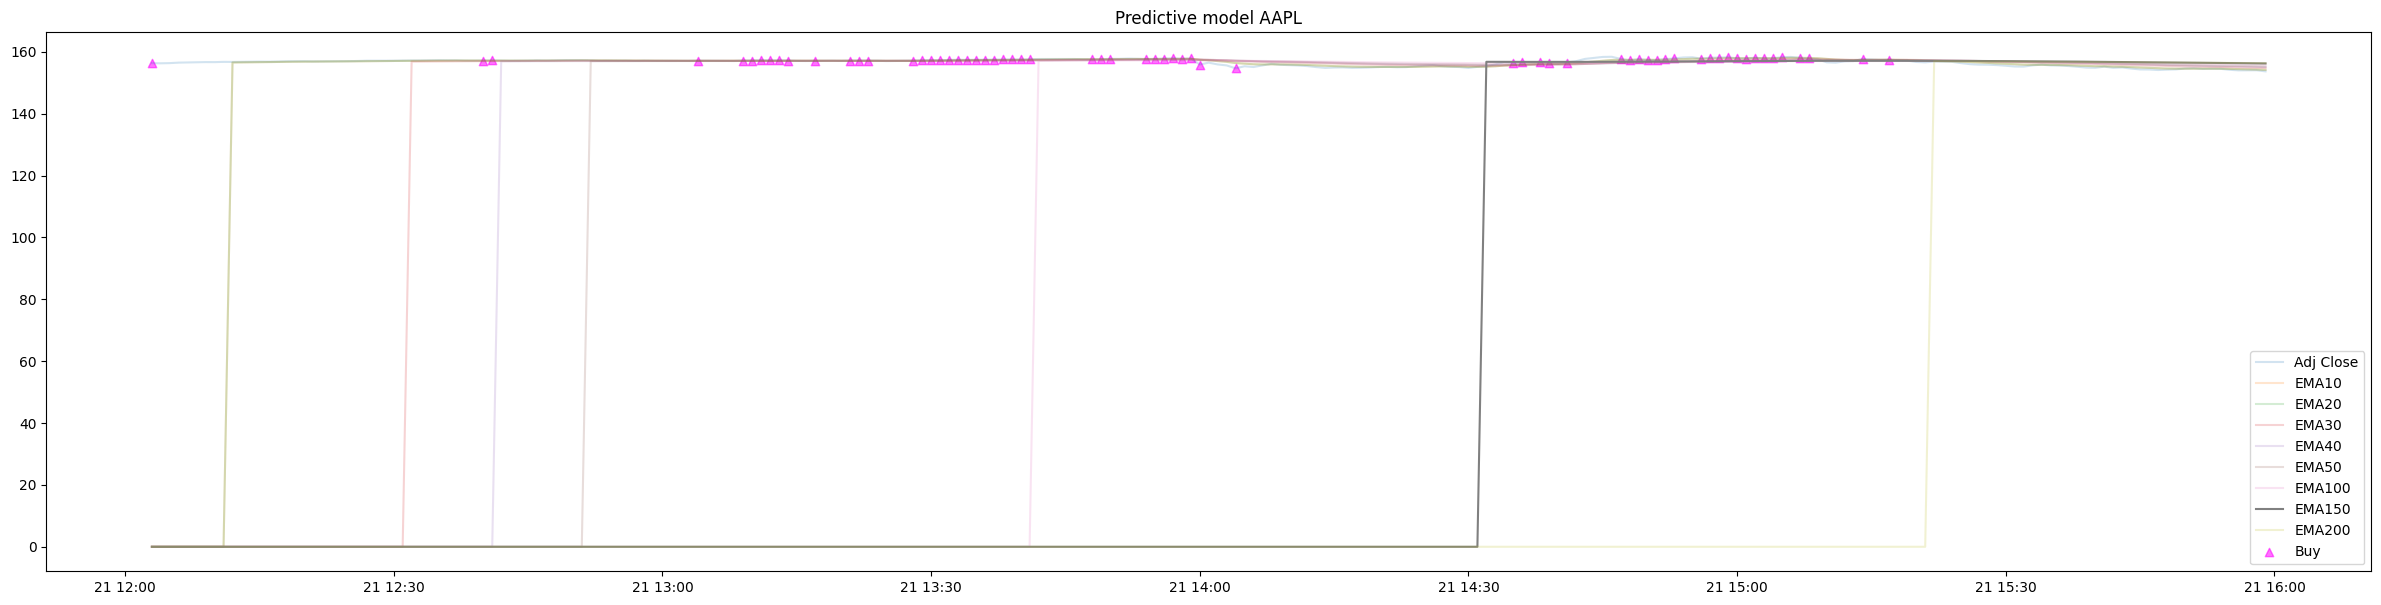

In [24]:
# zoomed in view
ticks_back = 500 # lookback n candles from now
plot_stock_prediction_tb(df, symbol, ticks_back)

### Intra day plots
good for stocks on 1 minute time granularity, manages intra day gaps in plots

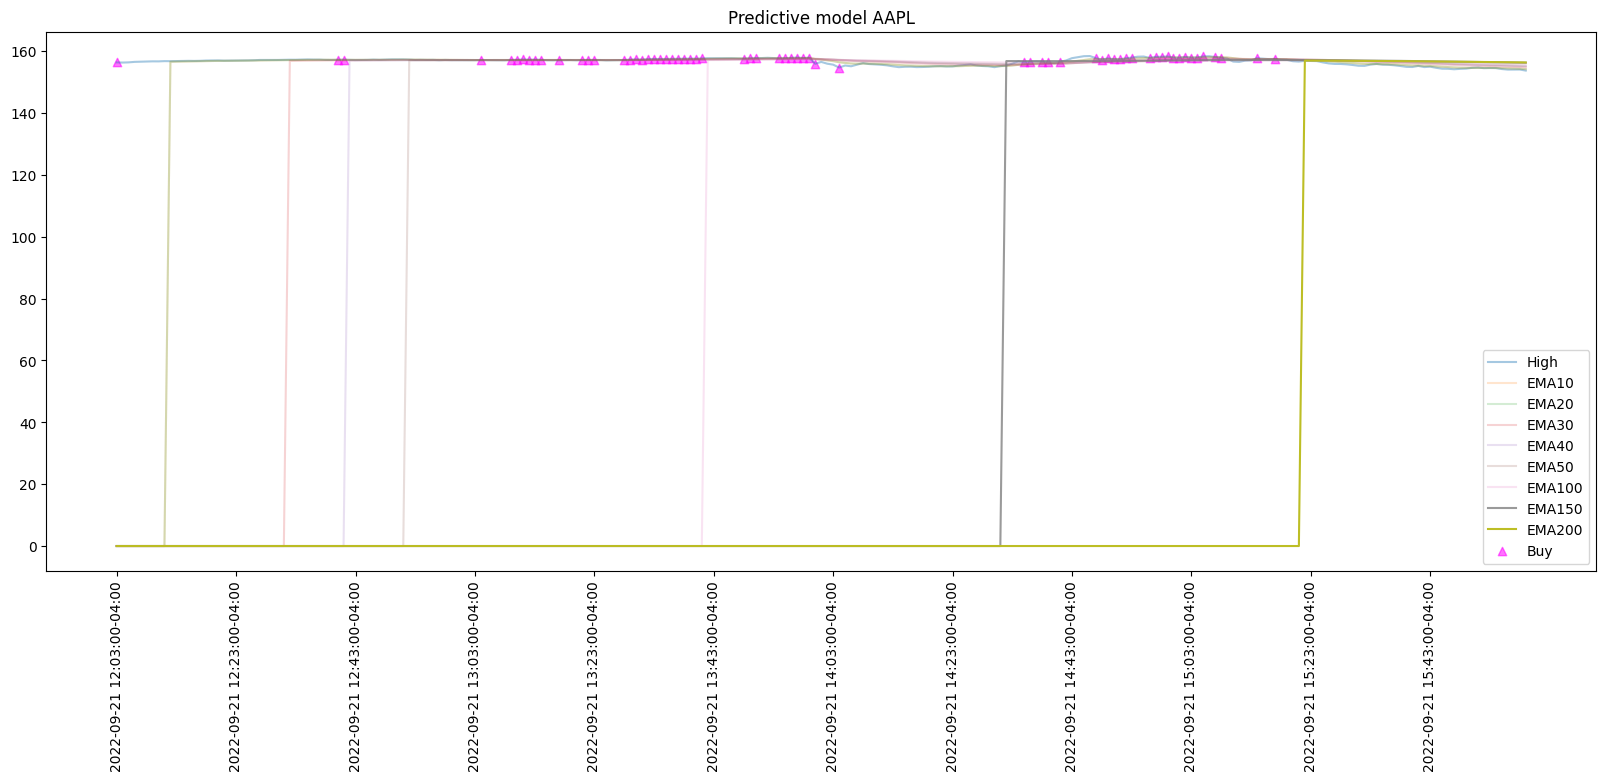

In [25]:
# high level view
ticks_back = 1200 # lookback n candles from now
plot_stock_prediction_zoom(df, symbol, ticks_back)

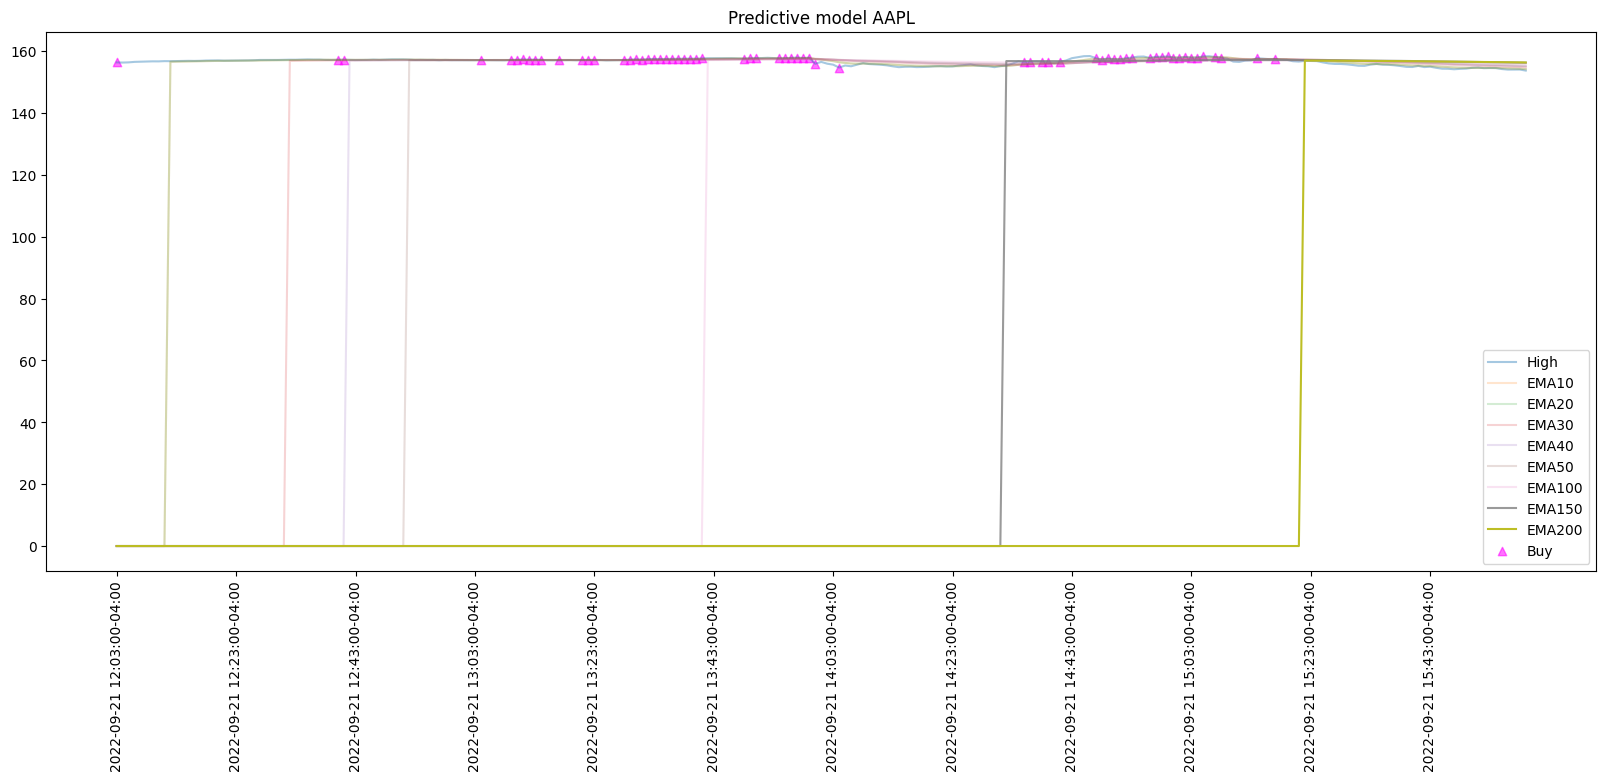

In [26]:
# zoomed in view
ticks_back = 500 # lookback n candles from now
plot_stock_prediction_zoom(df, symbol, ticks_back)

# Daemonize the script to run every minute
but running script every minute by cron should be more reliable, also prevents time drift

In [ ]:
# --- UNCOMMENT TO RUN CONTINUOUSLY ---

#while True:
#    
#    ## #data = get_ticker_data_from_db(symbol, db_name, table_name)
#    ##data = get_ticker_data_from_db_days_back(symbol, db_name, table_name)
#    ##df = resample_data(data, granularity=granularity)
#   
#
#    # yfinance temp workaround
#    df = get_data(symbol, interval)
#
#    # prepare dfs with extra indicators
#    out_df1 = superjumpTBB(df)      # superjumpTBB
#    out_df1.replace({False: 0, True: 1}, inplace=True)
#    out_df2 = HHLL_Strategy(df)  # HHHL indicator
#    out_df2.replace({False: 0, True: 1}, inplace=True)
#    out_df3 = HHLL_confirmation(df)  # HHLL confirmation
#    # converting 'u','d', 'none' to integers for 'trend_conf' col
#    out_df3.replace({'d': 0, 'u': 1, 'none': -1}, inplace=True)
#    out_df4 = HHLL_Channel(df)
#    out_df5 = rsi_strategy(df)
#
#    # compute general indicators, features and target
#    df = compute_technical_indicators(df)
#    df = compute_features(df)
#    df = define_target_condition(df)
#
#    # merge with custom indicators
#    df = pd.merge(df, out_df1, how='inner', on='Date')
#    df = pd.merge(df, out_df2, how='inner', on='Date')
#    df = pd.merge(df, out_df3, how='inner', on='Date')
#    df = pd.merge(df, out_df4, how='inner', on='Date')
#    df = pd.merge(df, out_df5, how='inner', on='Date')
#
#    # actual prediction
#    # can take longer if the dataframe is big
#    # so we are making shorter dataframe for this
#    df_short = df.iloc[-100:]
#    
#    predict_timeseries(df_short, clf)
#
#    # zoomed in plot view
#    ticks_back = 500 # lookback n candles from now
#    plot_stock_prediction_zoom(df_short, symbol, ticks_back)
#
#
#
#    time.sleep(60)
